In [37]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
from numpy.random import randn
import os
from datetime import datetime

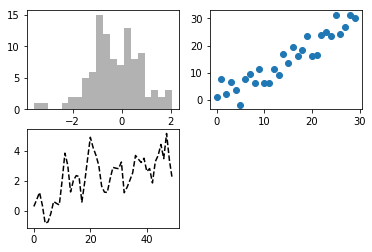

In [38]:
# maplotlib的图像都在Figure对象中，可以用plt.figure创建一个新的Figure
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)             # 返回的是AxesSubplot对象
plt.plot(randn(50).cumsum(),'k--')  # k-- 是一个线型选项,最简单的折线图

_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)  # 直方图
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))       # 散点图


[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016064C656D8>


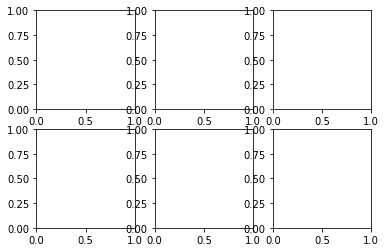

In [39]:
# 也可以根据plt.subplots方法中直接创建一个新的figure对象，
# 并返回一个含有已创建的subplot对象的numpy数组
fig, axes = plt.subplots(2,3)
print(axes)

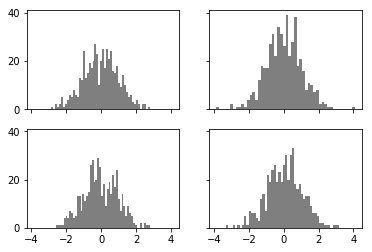

In [40]:
# 未调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)


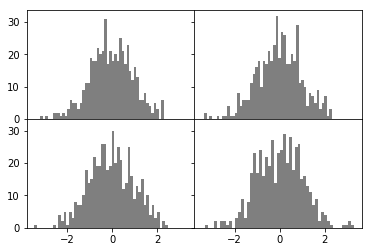

In [41]:
# 调整subplot周围的间距
fig, axes = plt.subplots(2, 2, sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0) # 注意其中的轴标签重叠了


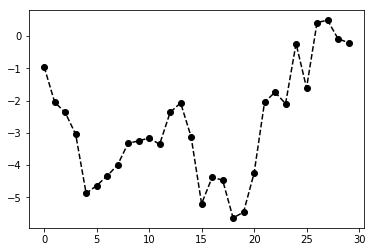

In [42]:
plt.plot(randn(30).cumsum(),'ko--') # 

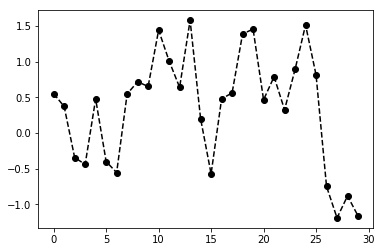

In [43]:
# 还可以将其写成更为明确的形式,和上面的参数设置效果是一样的
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

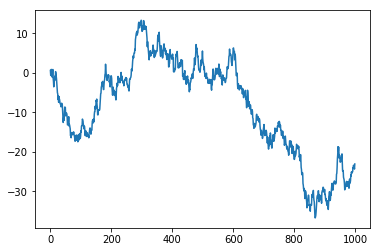

In [44]:
# 刻度、标签和图例，下面介绍如何设置标题、周标签、刻度以及刻度标签
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

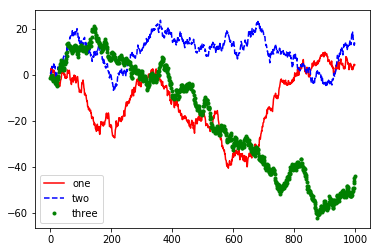

In [45]:
# 添加图例，添加图例有两种方式：
# 第一种方式，在添加subplot的时候传入label参数：
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(),'k',label='one',color='r')
ax.plot(randn(1000).cumsum(),'k--',label='two',color='b')
ax.plot(randn(1000).cumsum(),'k.',label='three',color='g')
# 然后调用ax.legend()来自动创建图例：
ax.legend(loc='best')

Text(0, 0.5, 'Ystages')

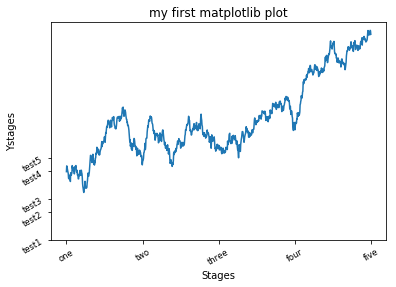

In [46]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ticks = ax.set_yticks([-25, -15, -10, 0, 5])
labels = ax.set_yticklabels(['test1','test2','test3','test4','test5'],rotation=30,fontsize='small')
ax.set_title('my first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Ystages')


Text(0.75, 0.6, 'Hello world!')

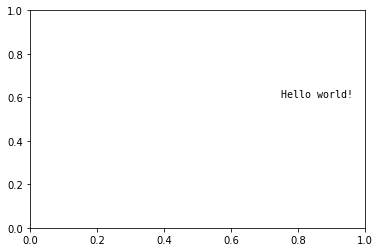

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.75, 0.6,           # 相对坐标轴的比例
        'Hello world!',
        family='monospace',
        fontsize=10)                # 放置标注文本

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


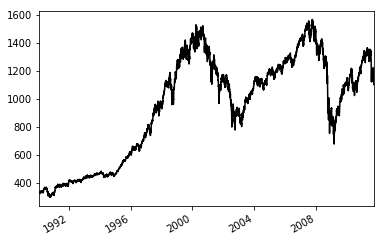

In [48]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


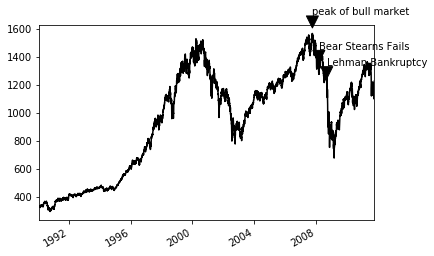

In [49]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75
spx: 
 1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64 type: <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Important dates in 2008-2009 financial crisis')

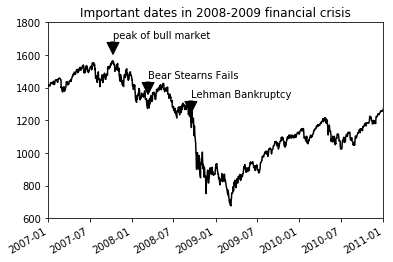

In [50]:
path = os.getcwd()+'\data\spx.csv'
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv(path,index_col=0,parse_dates=True)
print(data.head())
spx = data['SPX']   # x label sticks
print('spx: \n',spx.head(),'type:',type(spx))
spx.plot(ax=ax,style='k-')
crisis_data = [
    (datetime(2007,10,11),'peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]
for date,label in crisis_data:
    ax.annotate(label,xy=(date, spx.asof(date)+50)
                    ,xytext=(date,spx.asof(date)+200)
                    ,arrowprops=dict(facecolor='black')
                    ,horizontalalignment='left'
                    ,verticalalignment='top')
# 放大到2007-2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

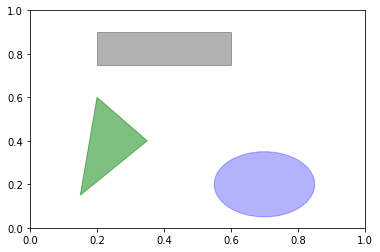

In [51]:
# 要在图表中添加一个图形，需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)     # 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)  
pgon = plt.Polygon([[0.15, 0.15],[0.35, 0.4],[0.2, 0.6]],color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('fig_pat.png',dpi=400,bbox_inches='tight')   # dpi(控制‘每英寸点数’分辨率),bbox_inches('tight')

In [52]:
# 下面研究如何将图表保存到文件
# 利用plt.savefig可以将当前图表保存到文件。
# 例如保存为svg文件的话，需要输入
# plt.savefig('test.svg')
plt.savefig('fig_pat.png',dpi=400,bbox_inches='tight')   # dpi(控制‘每英寸点数’分辨率),bbox_inches('tight')剪除空白的部分


# Figure.savefig的选项Figure.savefig(fname,dpi,facecolor,format,bbox_inches)

<Figure size 432x288 with 0 Axes>

In [53]:
# savefig并非一定要写入磁盘，也可以写入任何文件类型的对象，比如StringIo
from io import BytesIO

buffer = BytesIO()   # 原文中，使用StringIo的方法会报TypeError: string argument expected, got 'bytes' 错误，所以这里使用的  BytesIO方法
plt.savefig(buffer)
plot_data = buffer.getvalue()
plot_data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb0\x00\x00\x01 \x08\x06\x00\x00\x00\xd5(&i\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 3.0.3, http://matplotlib.org/\x9d\x0b\xab\xa3\x00\x00\x04WIDATx\x9c\xed\xd5A\r\x00 \x10\xc00\xc0\xbf\xe7\xc3\x03\x1f\xb2\xa4U\xb0\xdf\xf6\xcc\xcc\x02\x80\x98\xf3;\x00\x00^\x18\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\x90d`\x00$\x19\x18\x00I\x06\x06@\x92\x81\x01\

<Figure size 432x288 with 0 Axes>

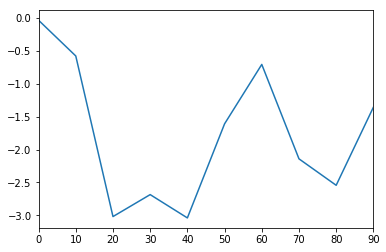

In [54]:
# pandas中也有绘图函数
# 利用pandas绘制线型图
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(kind='line',use_index=True)                                                        # series的plot方法Y为数据，X轴为默认的索引


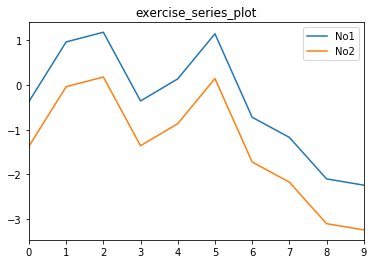

In [55]:
# 练习：使用series.plot的参数
s = Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(kind='line',legend=True,use_index=False,title='exercise_series_plot',label='No1')   # series的plot方法Y为数据，X轴为默认的索引
(s-1).plot(kind='line',legend=True,use_index=False,label='No2')   # series的plot方法Y为数据，X轴为默认的索引


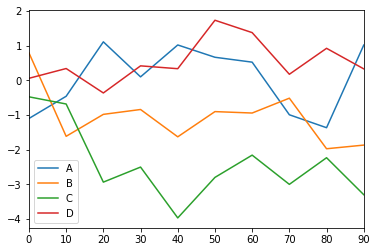

In [56]:
# 利用dataframe的plot方法会在subplot中创建每一列的曲线，并且自动创建图例
df = DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],index=np.arange(0,100,10))
df.plot()


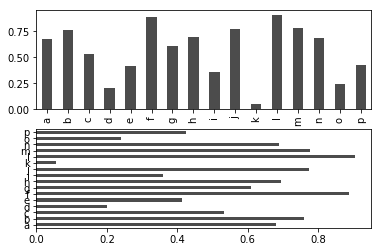

In [57]:
#下面开始绘制柱状图
# 首先用Series绘制柱状图
# kind='bar' 或 kind='barh'
fig, axes = plt.subplots(2, 1)    # 创建一个两行一列的subplot对象
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)    # 第一个图像用ax=axes[0]这个来控制
data.plot(kind='barh', ax=axes[1], color='k',alpha=0.7)     # 第二个图像用ax=axes[1]这个来控制

In [58]:
# 下面使用dataframe进行绘图
df = DataFrame(np.random.rand(6,4), index=['one','two','three','four','five','six'], 
                columns=pd.Index(['A','B','C','D'],name='Genus'))           # 对于Dataframe格式来说，柱状图会将每一行分为一组
                
df

Genus,A,B,C,D
one,0.266917,0.196498,0.719960,0.655835
two,0.556127,0.130556,0.161758,0.088298
three,0.655978,0.298292,0.156214,0.235865
four,0.059085,0.665764,0.923776,0.266676
five,0.005117,0.071513,0.516316,0.857426
six,0.990925,0.626298,0.101394,0.635226


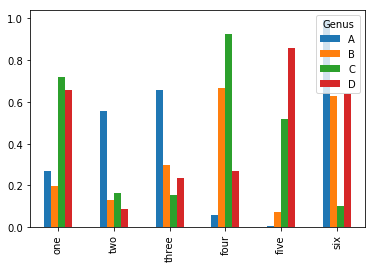

In [59]:
df.plot(kind='bar')   # 默认图像的横轴为纵向索引，图像的纵轴分组为不同的column

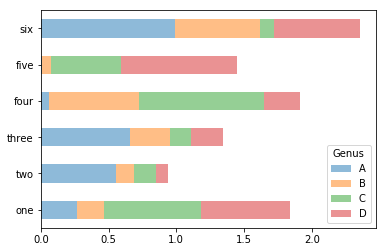

In [60]:
df.plot(kind='barh',stacked=True,alpha=0.5)  # 设置stacked=True即可为DataFrame生成堆积柱状图

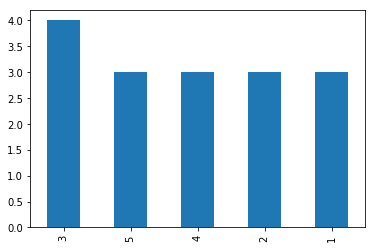

In [61]:
# 柱状图还有个新的用法，比如统计一个Seris中的不同值出现的频率，进而统计频率分布直方图
s = pd.Series([1,1,1,2,2,2,3,3,3,3,4,4,4,5,5,5])
s.value_counts().plot(kind='bar')

In [62]:
path = os.getcwd()+'\data\\tips.csv'
tips = pd.read_csv(path) 
party_counts = pd.crosstab(tips.day, tips["size"])   # 交叉表是用于统计分组频率的特殊透视表

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [63]:
party_counts = party_counts.ix[:, 2:5]  # 把2-5列删减出来
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [64]:
# 为了发现规律，需要我们进行归一化处理
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis=0)   # div表示整除操作
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


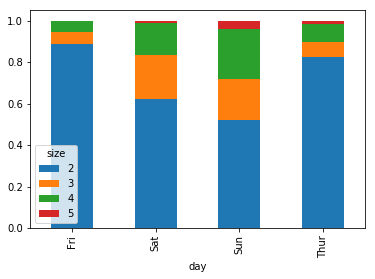

In [65]:
party_pcts.plot(kind='bar',stacked=True)  # 从下面柱状图可以看出，周末的聚会规模在变大

In [66]:
# 下面开始进行直方图和密度图的学习

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4


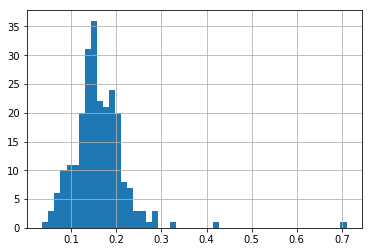

In [67]:
# 直方图是一种可以对值频率进行离散化显示的柱状图。
path = os.getcwd()+'\data\\tips.csv'
tips = pd.read_csv(path) 
print(tips.head())
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)      # 频率分布直方图，查看tip列占total_bill列的比例

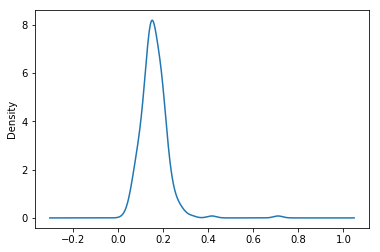

In [68]:
# 与此相关的一种图表类型是密度图，它是通过计算：可能会产生观测数据的连续概率分布的估计，密度图也被称作KDE(Kernel Density Estimate,核密度估计)
import scipy
tips['tip_pct'].plot(kind='kde')

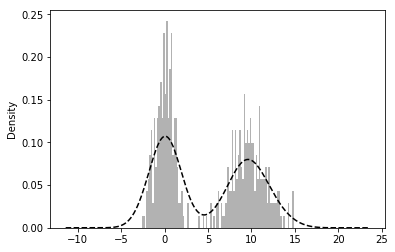

In [69]:
# 这两种图通常会被画在一起
comp1 = np.random.normal(0,1,size=200)   # N(0, 1)
comp2 = np.random.normal(10,2,size=200)  # N(10, 4)
values = pd.Series(np.concatenate([comp1, comp2]))  # 
values.hist(bins=100, alpha=0.3, color='k', normed=True) 
values.plot(kind='kde',style='k--')

In [70]:
# 散布图，观察两个一维数据序列之间的关系的有效手段
path = os.getcwd()+'\data\\macrodata.csv'
macro = pd.read_csv(path) 
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'changes in log m1 vs.log unemp')

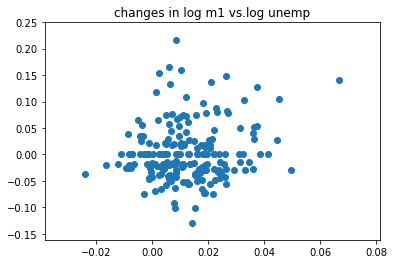

In [71]:
plt.scatter(trans_data['m1'],trans_data['unemp'])
plt.title('changes in log %s vs.log %s' %('m1','unemp'))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016065100EB8>,
      dtype=object)

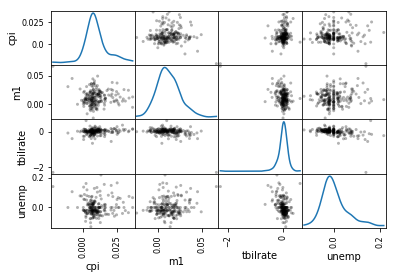

In [72]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde',color = 'k',alpha=0.3)